## **Import Python Libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np
#from sklearn.linear_model import LinearRegression
import seaborn as sns

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## **Import data csv files**

In [5]:
order = pd.read_csv("./drive/MyDrive/ecom/olist_orders_dataset.csv")
item = pd.read_csv("./drive/MyDrive/ecom/olist_order_items_dataset.csv")
product = pd.read_csv("./drive/MyDrive/ecom/olist_products_dataset.csv")
customer = pd.read_csv("./drive/MyDrive/ecom/olist_customers_dataset.csv")
geo = pd.read_csv("./drive/MyDrive/ecom/olist_geolocation_dataset.csv")
review = pd.read_csv("./drive/MyDrive/ecom/olist_order_reviews_dataset.csv")
payment = pd.read_csv("./drive/MyDrive/ecom/olist_order_payments_dataset.csv")
seller = pd.read_csv("./drive/MyDrive/ecom/olist_sellers_dataset.csv")
category = pd.read_csv("./drive/MyDrive/ecom/product_category_name_translation.csv")

In [8]:
dataframes = {"Order":order,
              "Item":item,"Product":product,"Customer":customer,"Geolocation":geo,
              "Review":review,"Payment":payment,"Seller":seller,"Category":category}

In [10]:
for name,df in dataframes.items():
    print(f"{name} : {df.shape}", end='\n\n')

Order : (99441, 8)

Item : (112650, 7)

Product : (32951, 9)

Customer : (99441, 5)

Geolocation : (1000163, 5)

Review : (99224, 7)

Payment : (103886, 5)

Seller : (3095, 4)

Category : (71, 2)



## **Explore and Preprocess data from order table**

In [11]:
for name,df in dataframes.items():
    print(f"{name} : {df.head()}", end='\n\n')

Order :                            order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00          

In [12]:
for name,df in dataframes.items():
    print(f"{name} : {df.isna().sum()}", end='\n\n')

Order : order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

Item : order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Product : product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Customer : customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state   

In [13]:
order['purchase_time']=pd.to_datetime(order['order_purchase_timestamp'])
order['approve_time']=pd.to_datetime(order['order_approved_at'])
order['delivered_carrier_date']=pd.to_datetime(order['order_delivered_carrier_date'])
order['delivered_customer_date']=pd.to_datetime(order['order_delivered_customer_date'])
order['estimated_date']=pd.to_datetime(order['order_estimated_delivery_date'])
dataframes["Order"] = order

In [14]:
order = order.drop(['order_purchase_timestamp','order_approved_at','order_delivered_carrier_date','order_delivered_customer_date','order_estimated_delivery_date'],axis=1)
dataframes["Order"] = order

In [ ]:
'''df_train = df_orders.merge(df_item, on='order_id', how='left')
df_train = df_train.merge(df_order_pay, on='order_id', how='outer', validate='m:m')
df_train = df_train.merge(df_reviews, on='order_id', how='outer')
df_train = df_train.merge(df_products, on='product_id', how='outer')
df_train = df_train.merge(df_customers, on='customer_id', how='outer')
df_train = df_train.merge(df_sellers, on='seller_id', how='outer')

print(df_train.shape)'''

"df_train = df_orders.merge(df_item, on='order_id', how='left')\ndf_train = df_train.merge(df_order_pay, on='order_id', how='outer', validate='m:m')\ndf_train = df_train.merge(df_reviews, on='order_id', how='outer')\ndf_train = df_train.merge(df_products, on='product_id', how='outer')\ndf_train = df_train.merge(df_customers, on='customer_id', how='outer')\ndf_train = df_train.merge(df_sellers, on='seller_id', how='outer')\n\nprint(df_train.shape)"

In [18]:
order['delivered_customer_date'] = order['delivered_customer_date'].fillna(order['estimated_date'])
dataframes["order"] = order

## **Explore and Preprocess data from Item table**

In [22]:
# item['shipping_date_limit']=pd.to_datetime(item['shipping_limit_date'])

In [23]:
# item= item.drop(['shipping_limit_date'],axis=1)
# dataframes["Item"] = item

# Explore and Preprocess Order Reviews Dataset

In [25]:
review["review_creation_date"] = pd.to_datetime(review["review_creation_date"])
review["review_answer_timestamp"] = pd.to_datetime(review["review_answer_timestamp"])
dataframes["Review"] = review

In [26]:
item = item.convert_dtypes()
order = order.convert_dtypes()
product = product.convert_dtypes()

review = review.convert_dtypes()
category = category.convert_dtypes()
customer = customer.convert_dtypes()
seller = seller.convert_dtypes()
payment = payment.convert_dtypes()
geo = geo.convert_dtypes()

In [33]:
for name,df in dataframes.items():
    print(f"{name} : {df.describe}", end='\n\n')

Order : <bound method NDFrame.describe of                                order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status       purchase

In [34]:
for name,df in dataframes.items():
    print(f"{name} : {df.info()}", end='\n\n')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   order_id                 99441 non-null  object        
 1   customer_id              99441 non-null  object        
 2   order_status             99441 non-null  object        
 3   purchase_time            99441 non-null  datetime64[ns]
 4   approve_time             99281 non-null  datetime64[ns]
 5   delivered_carrier_date   97658 non-null  datetime64[ns]
 6   delivered_customer_date  99441 non-null  datetime64[ns]
 7   estimated_date           99441 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.1+ MB
Order : None

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----

In [27]:
sale_by_year = pd.merge(order,item,on="order_id")

sale_by_year["order_year"] = sale_by_year["purchase_time"].dt.year
sale_by_year

sale_monthly_2017 = sale_by_year.loc[sale_by_year["order_year"] == 2017]
sale_monthly_2018 = sale_by_year.loc[sale_by_year["order_year"] == 2018]

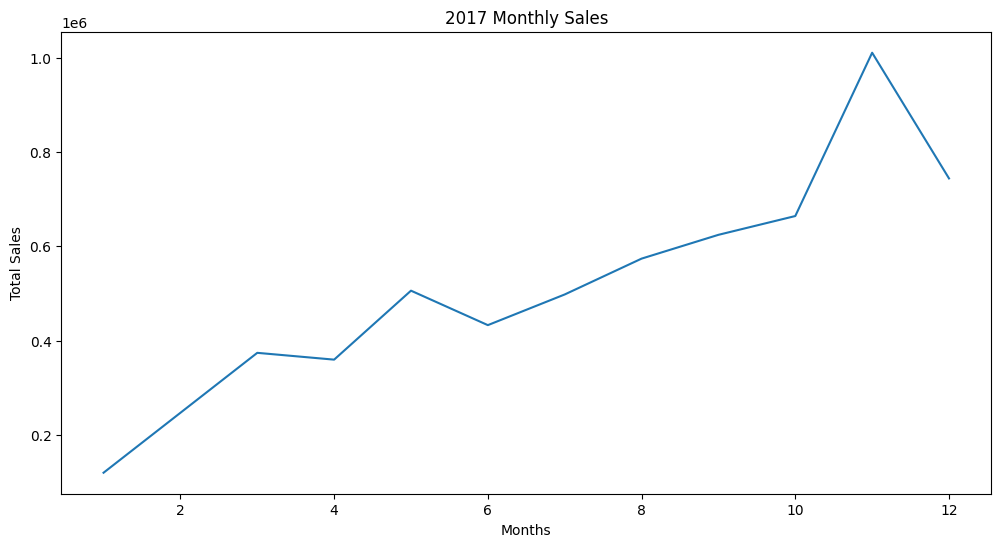

In [28]:
sale_monthly_2017 = sale_monthly_2017.copy()
sale_monthly_2017["order_month"] = sale_monthly_2017["purchase_time"].dt.month
sale_monthly_2017 = sale_monthly_2017.groupby("order_month")["price"].sum().reset_index()
plt.figure(figsize=(12,6))
plt.plot(sale_monthly_2017["order_month"],sale_monthly_2017["price"])
plt.xlabel("Months")
plt.ylabel("Total Sales")
plt.title("2017 Monthly Sales")
plt.show()

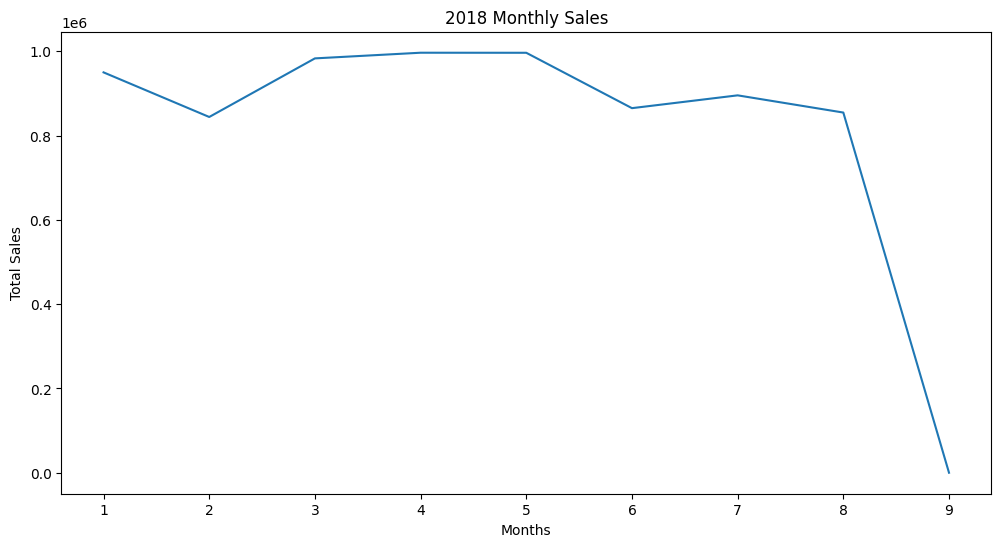

In [29]:
sale_monthly_2018 = sale_monthly_2018.copy()
sale_monthly_2018["order_month"] = sale_monthly_2018["purchase_time"].dt.month
sale_monthly_2018 = sale_monthly_2018.groupby("order_month")["price"].sum().reset_index()
plt.figure(figsize=(12,6))
plt.plot(sale_monthly_2018["order_month"],sale_monthly_2018["price"])
plt.xlabel("Months")
plt.ylabel("Total Sales")
plt.title("2018 Monthly Sales")
plt.show()

In [30]:
df = pd.merge(left=order,right=pd.merge(left=item,right=product,on="product_id"),on="order_id")

# finding delayed deliveries
df = df.loc[df["delivered_customer_date"] > df["estimated_date"]].copy()

# conversion to datetime format
df["delivered_date"] = df["delivered_customer_date"].dt.date
df["estimated_date"] = df["estimated_date"].dt.date

df = df.loc[:, ["order_id","delivered_date","estimated_date"]]

# calculating the days of delay
df["delayed"] = df["delivered_date"] - df["estimated_date"]
df["delayed_days"] = pd.to_timedelta(df["delayed"])
df['delayed'] = pd.to_timedelta(df['delayed']).dt.days

df = df.loc[(df['delayed'] >=1) & (df["delayed"] <= 10)]

dfs = df.groupby(["delayed_days"])["delayed"].count()

# convert to dataframe
df = dfs.reset_index()

df["count"] = df["delayed"]
df = df.loc[:,["delayed_days","count"]]
df

,delayed_days,count
0,1 days,938
1,2 days,603
2,3 days,569
3,4 days,495
4,5 days,507
5,6 days,452
6,7 days,553
7,8 days,378
8,9 days,249
9,10 days,223
